# pyLDavis and Zip's law - visualizations

In [3]:
import pandas as pd

In [67]:
#import richtig2.csv and richtig_polarities.csv

df5 = pd.read_csv(r'./richtig2.csv', delimiter=";", error_bad_lines=False, engine ='python')
df_richtig = pd.read_csv(r'./richtig_polarities.csv', delimiter=";", error_bad_lines=False, engine ='python')

/var/folders/h4/_3bxdywd1l3233v2d69_tn880000gn/T/ipykernel_594/362509273.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df5 = pd.read_csv(r'./richtig2.csv', delimiter=";", error_bad_lines=False, engine ='python')
/var/folders/h4/_3bxdywd1l3233v2d69_tn880000gn/T/ipykernel_594/362509273.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_richtig = pd.read_csv(r'./richtig_polarities.csv', delimiter=";", error_bad_lines=False, engine ='python')


In [5]:
df5

,suggestion_id,label,queryterm,date,client,lang,geolocation,url,proxy_ip,proxy_city,...,lexunits,hypernyms,lexunits_hypernyms,hyponyms,lexunits_hyponyms,tokens_suggestions_tensor,lexunits_tensor,tokens_suggestions_tensor_sum,lexunits_tensor_sum,tokens_suggestions_cleaned_root_polarität
0,4538393,google_psy,judentum,2020-05-03 08:07:15.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"['regulieren', 'regeln', 'steuern', 'regeln', ...","[{Synset(id=s53551, lexunits=bedienen, führen)...","['bedienen', 'führen', 'ordnen', 'wandeln', 'ä...","[{Synset(id=s119492, lexunits=aufdrehen), Syns...","['aufdrehen', 'überdrehen', 'fernsteuern', 'au...","tensor([-7.2186e-05, -1.6253e-01, -9.5548e-01,...","tensor([-0.7929, -0.4550, -0.8447, -0.4550, -0...",tensor(-3.5467),tensor(-3.0024),"[['neutral', 'positive', 'negative', 'neutral'..."
1,4538396,google_psy,christentum,2020-05-03 08:07:17.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"['fasten', 'regulieren', 'regeln', 'steuern', ...","[{Synset(id=s55172, lexunits=aufgeben, verzich...","['aufgeben', 'verzichten', 'versagen', 'bedien...","[{Synset(id=s54552, lexunits=heilfasten)}, {Sy...","['heilfasten', 'aufdrehen', 'überdrehen', 'fer...","tensor([-1.1081e-01, -1.4796e-03, 8.2854e-01,...","tensor([ 0.8165, -0.7929, -0.4550, -0.8447, -0...",tensor(-1.2629),tensor(-3.0748),"[['positive', 'neutral', 'positive', 'positive..."
2,4538397,google_firefox,judentum,2020-05-03 08:07:17.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"['regulieren', 'regeln', 'steuern', 'regeln', ...","[{Synset(id=s53551, lexunits=bedienen, führen)...","['bedienen', 'führen', 'ordnen', 'wandeln', 'ä...","[{Synset(id=s119492, lexunits=aufdrehen), Syns...","['aufdrehen', 'überdrehen', 'fernsteuern', 'au...","tensor([-7.2186e-05, -1.6253e-01, -1.4682e-03,...","tensor([-0.7929, -0.4550, -0.8447, -0.4550, -0...",tensor(-2.5927),tensor(-3.0024),"[['neutral', 'positive', 'neutral', 'neutral',..."
3,4538399,google_firefox,christentum,2020-05-03 08:07:19.0,firefox,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"['fasten', 'regulieren', 'regeln', 'steuern', ...","[{Synset(id=s55172, lexunits=aufgeben, verzich...","['aufgeben', 'verzichten', 'versagen', 'bedien...","[{Synset(id=s54552, lexunits=heilfasten)}, {Sy...","['heilfasten', 'aufdrehen', 'überdrehen', 'fer...","tensor([-1.1081e-01, -1.4796e-03, 8.2854e-01,...","tensor([ 0.8165, -0.7929, -0.4550, -0.8447, -0...",tensor(-1.2629),tensor(-3.0748),"[['positive', 'neutral', 'positive', 'positive..."
4,4538400,google_psy,atheismus,2020-05-03 08:07:19.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,"['bilden', 'formen', 'machen', 'ausmachen', 'f...","[{Synset(id=s51892, lexunits=sein)}, {Synset(i...","['sein', 'entstehen', 'schaffen', 'erschaffen'...","[{Synset(id=s123390, lexunits=überformen), Syn...","['überformen', 'darstellen', 'vorstellen', 're...","tensor([-2.3575e-03, -2.8135e-03, -5.6211e-02,...","tensor([ 1.6007e-01, -8.6229e-04, 8.4064e-01,...",tensor(-0.2194),tensor(0.1924),"[['neutral', 'positive', 'negative', 'positive..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,4565063,google_psy,islam,2020-05-03 20:10:13.0,psy-ab,de-DE,DE,https://www.google.com/complete/search,localhost,Köln,...,[],[],[],[],[],"tensor([-6.1934e-05, 7.3311e-01, -3.0274e-03,...",NaN,tensor(0.9242),NaN,"[['neutral', 'positive', 'positive', 'negative..."
60,4565078,ddg,judentum,2020-05-03 20:10:19.0,NaN,NaN,NaN,https://duckduckgo.com/ac/,localhost,Köln,...,[],[],[],[],[],"tensor([-6.6308e-05, -1.1081e-01, -9.9329e-01,...",NaN,tensor(-3.5835),NaN,"[['neutral', 'positive', 'negative', 'negative..."
61,4565083,ddg,christentum,2020-05-03 20:10:21.0,NaN,NaN,NaN,https://duckduckgo.com/ac/,localhost,Köln,...,[],[],[],[],[],"tensor([-0.9823, 0.8883, -0.9509, -0.0562, -0...",NaN,tensor(-0.0970),NaN,"[['negative', 'positive', 'negat

# pyLDAvis

In [12]:
#Quelle: https://nbviewer.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=
#Quelle: https://github.com/bmabey/pyLDAvis/issues/4
#!pip install pyLDAvis

#getting pyLDAvis graphic of token_suggestions_cleaned_root

from importlib import reload
import pyLDAvis
import gensim
from gensim import corpora, models, similarities
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import sys
from collections import defaultdict

#the part below is used to get the data of a specific column of a dataframe converted and ready to be shown as a graph via pyLDAvis (external libary)
#this section will be used several times in the following code and only slightly changed for the needs of the given column

documents = df5['tokens_suggestions_cleaned_root']
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.split() if word not in stoplist]
         for document in documents]
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, passes=50)

visdata = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(visdata)

# Zip's law

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
['geschichte', 'feste', 'anhänger', 'religion', 'gott', 'entstehung', 'regeln', 'feiertage', 'symbolefeste', 'verbreitung', 'fasten', 'referat', 'entstehung', 'regeln', 'symbole', 'staatsreligion', 'englischgeschichte', 'feste', 'verbreitung', 'religion', 'gott', 'entstehung', 'regeln', 'feiertage', 'symbolefeste', 'verbreitung', 'fasten', 'referat', 'ent

<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Religionen'}, xlabel='Word', ylabel='Count'>

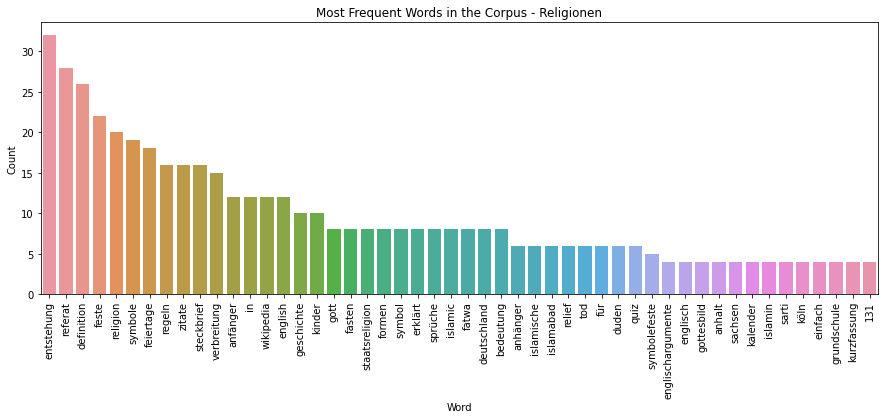

In [13]:
#https://www.kaggle.com/code/vishynair/zipf-s-law-validation-with-word-frequency/notebook
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
import string
from nltk import FreqDist
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

#Applying the remove_punctuation function
df5['tokens_suggestions_cleaned_root'] = df5['tokens_suggestions_cleaned_root'].apply(remove_punctuations)

def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

#Building the corpus
corpus = build_corpus(df5['tokens_suggestions_cleaned_root'])

#Converting all the words into lowercase
corpus = corpus.lower()

#Splitting the entire corpus
corpus = corpus.split()

#Observing the first few words
print(corpus[:50])

#Most Frequent Words in the Corpus - Religionen
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Religionen")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot



plot_word_frequency(corpus,50)

# comparison of each religion

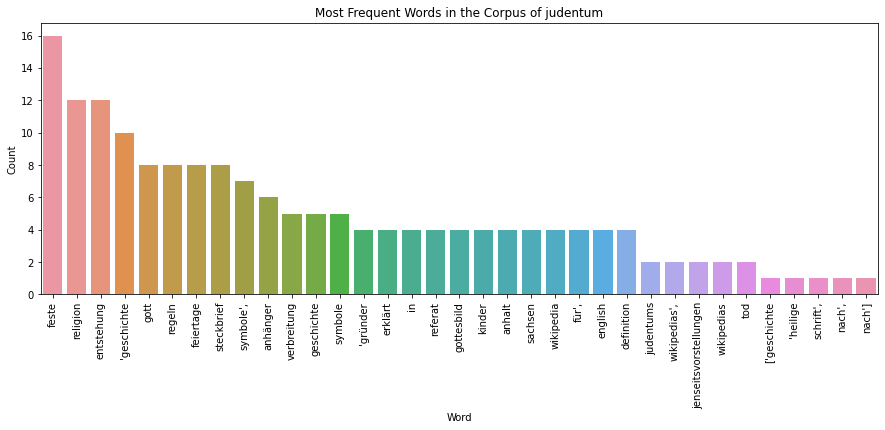

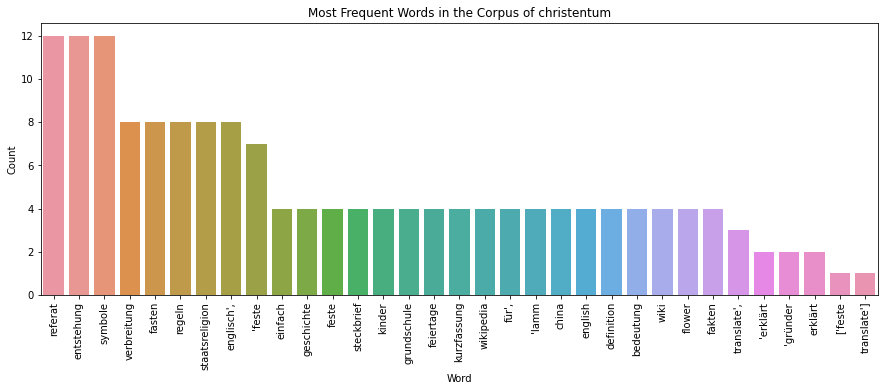

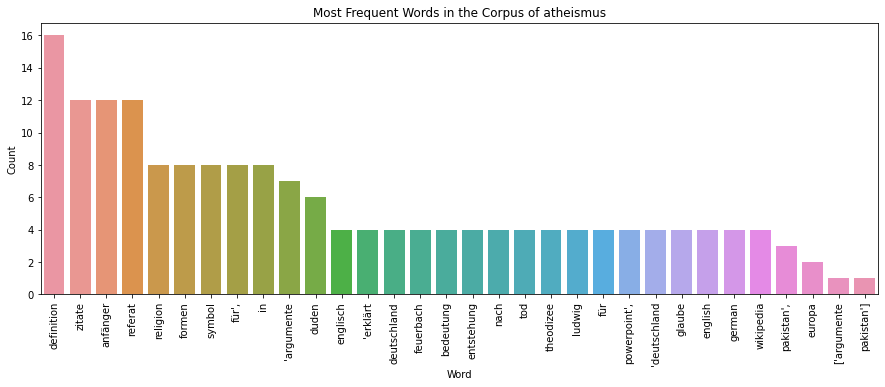

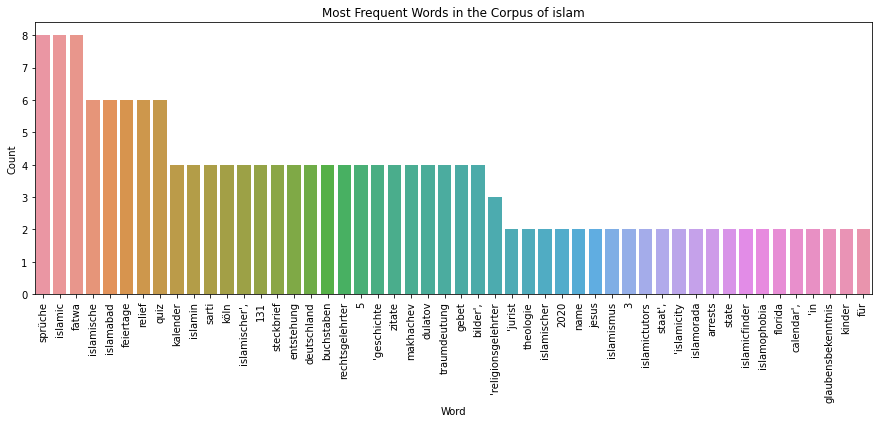

In [15]:
#comparison of judentum, christentum, atheismus, islam

import re

#Applying the remove_punctuation function
df5['tokens_suggestions_cleaned_root'] = df5['tokens_suggestions_cleaned_root'].apply(remove_punctuations)

def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

def plot_word_frequency_by_religion(religion,words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus of "+religion)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

corpus = {}
#Building the corpus
for row in df5.itertuples(index=True, name='Pandas'):
    if row.tokensroot in corpus.keys():
        corpus[row.tokensroot].append(row.tokens_suggestions_cleaned_root)
    else:
        corpus[row.tokensroot] = []
        corpus[row.tokensroot].append(row.tokens_suggestions_cleaned_root)
for religion in corpus:
    #Converting all the words into lowercase
    corpus_religion = str(corpus[religion]).lower()

    #Splitting the entire corpus
    corpus_religion = corpus_religion.split()
    plot_word_frequency_by_religion(re.sub(r'[\[\]\']', '', religion), corpus_religion,50)

# Hypernyms religions

['bedienen', 'führen', 'ordnen', 'wandeln', 'ändern', 'mutieren', 'verändernaufgeben', 'verzichten', 'versagen', 'bedienen', 'führen', 'ordnen', 'wandeln', 'ändern', 'mutieren', 'verändern', 'britisch', 'großbritannisch', 'britannischbedienen', 'führen', 'ordnen', 'wandeln', 'ändern', 'mutieren', 'verändernaufgeben', 'verzichten', 'versagen', 'bedienen', 'führen', 'ordnen', 'wandeln', 'ändern', 'mutieren', 'verändern', 'britisch', 'großbritannisch', 'britannischsein', 'entstehen', 'schaffen', 'erschaffen', 'machen', 'bilden', 'britisch', 'großbritannisch', 'britannischsein', 'entstehen', 'schaffen', 'erschaffen', 'machen', 'bilden']


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Religionen Hypernyms'}, xlabel='Word', ylabel='Count'>

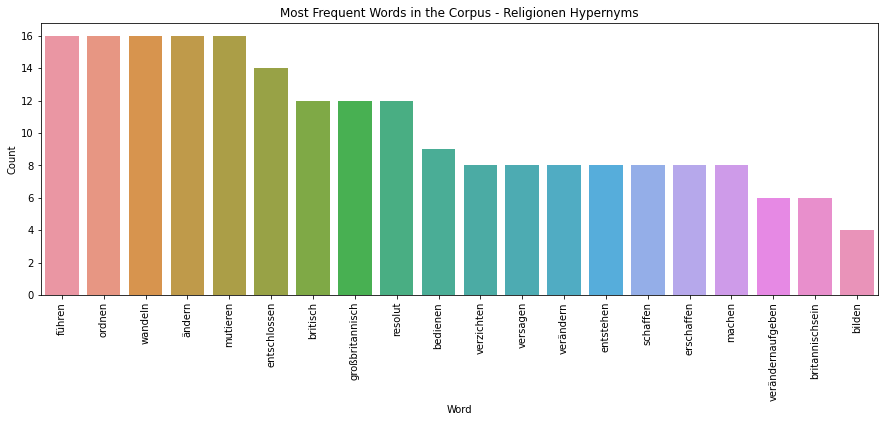

In [16]:
#Most Frequent Words in the Corpus - Religionen Hypernyms

import warnings
warnings.filterwarnings('ignore')

#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

#Applying the remove_punctuation function
df5['lexunits_hypernyms'] = df5['lexunits_hypernyms'].apply(remove_punctuations)

def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus
corpus = build_corpus(df5['lexunits_hypernyms'])

#Converting all the words into lowercase
corpus = corpus.lower()

#Splitting the entire corpus
corpus = corpus.split()

#Observing the first few words
print(corpus[:50])


def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Religionen Hypernyms")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot



plot_word_frequency(corpus,20)

# Hyponyms religion

['aufdrehen', 'überdrehen', 'fernsteuern', 'aussteuern', 'klimatisierenheilfasten', 'aufdrehen', 'überdrehen', 'fernsteuern', 'aussteuern', 'klimatisieren', 'südenglisch', 'nordwestenglisch', 'mittelenglisch', 'altenglisch', 'nordenglischaufdrehen', 'überdrehen', 'fernsteuern', 'aussteuern', 'klimatisierenheilfasten', 'aufdrehen', 'überdrehen', 'fernsteuern', 'aussteuern', 'klimatisieren', 'südenglisch', 'nordwestenglisch', 'mittelenglisch', 'altenglisch', 'nordenglischüberformen', 'darstellen', 'vorstellen', 'repräsentieren', 'schmieden', 'schablonieren', 'schablonisieren', 'arten', 'zuschlagen', 'ausprägen', 'grammatikalisieren', 'südenglisch', 'nordwestenglisch', 'mittelenglisch', 'altenglisch', 'nordenglischüberformen', 'darstellen', 'vorstellen', 'repräsentieren', 'schmieden', 'schablonieren', 'schablonisieren']


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Religionen Hyponyms'}, xlabel='Word', ylabel='Count'>

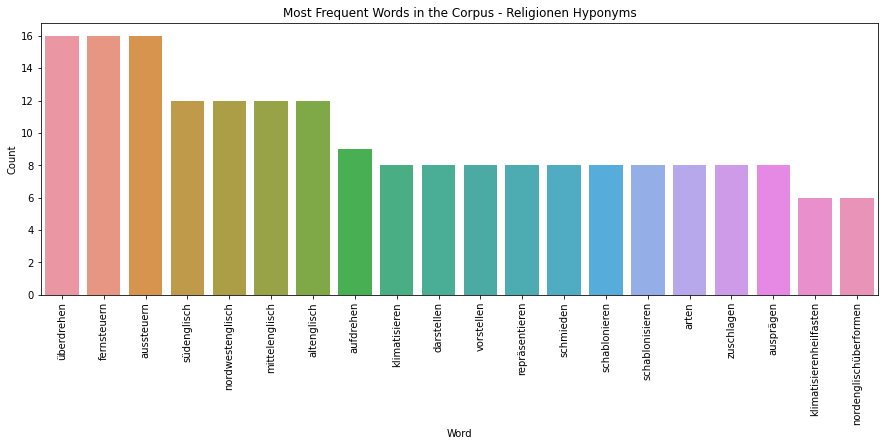

In [17]:
#Most Frequent Words in the Corpus - Religionen Hyponyms

import warnings
warnings.filterwarnings('ignore')

#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

#Applying the remove_punctuation function
df5['lexunits_hyponyms'] = df5['lexunits_hyponyms'].apply(remove_punctuations)

def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus
corpus = build_corpus(df5['lexunits_hyponyms'])

#Converting all the words into lowercase
corpus = corpus.lower()

#Splitting the entire corpus
corpus = corpus.split()

#Observing the first few words
print(corpus[:50])


def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Religionen Hyponyms")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot



plot_word_frequency(corpus,20)

# All ethnics

In [18]:
import pandas as pd
df6 = pd.read_csv(r'./richtig.csv', delimiter=";", error_bad_lines=False, engine ='python')

['türkei', 'urlaub', 'einwohner', 'coronavirus', 'corona', 'türkentaube', 'syrien', 'karte', '131', 'news', 'flaggetürkei', 'einwohner', 'coronavirus', 'corona', 'türkentaube', 'syrien', 'griechenland', 'karte', 'news', 'flaggetuerkenkriege', 'tuerkenbundlilie', 'turkey', 'tuerkenbund', 'tuerkenschanzpark', 'corona', 'em', 'tuerkerler', 'tuerkeitürkei', 'urlaub', 'reisewarnung', 'zurücktreten', 'gefangene', 'coronavirus', 'corona', 'türkentaube', 'nachrichten', 'virus', 'kostenlos', 'lira', 'news', 'heute', 'einreiseverbotpolemik', 'coronavirus', 'corona', 'dance', 'polenta', 'polestar', '131', 'polen', '2']


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Alle Ethnien'}, xlabel='Word', ylabel='Count'>

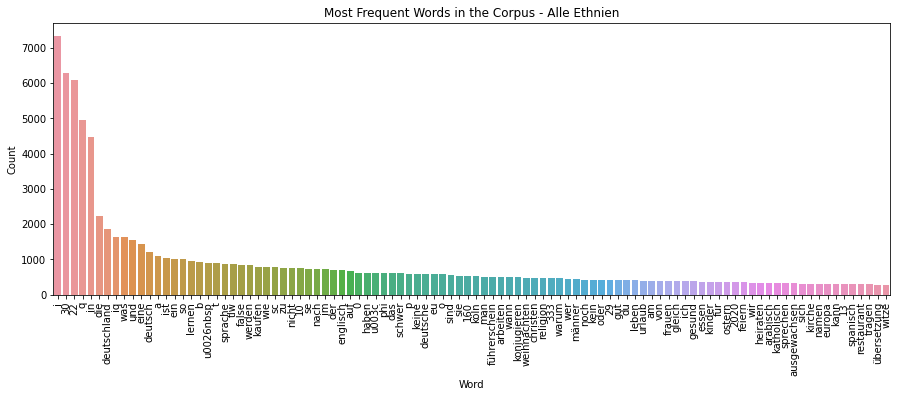

In [19]:
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

#Applying the remove_punctuation function
df6['tokens_suggestions_cleaned_root'] = df6['tokens_suggestions_cleaned_root'].apply(remove_punctuations)

def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

#Building the corpus
corpus = build_corpus(df6['tokens_suggestions_cleaned_root'])

#Converting all the words into lowercase
corpus = corpus.lower()

#Splitting the entire corpus
corpus = corpus.split()

#Observing the first few words
print(corpus[:50])


def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Alle Ethnien")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

#corpus_without_stop = [word for word in corpus if word not in stopwords.words("englisch")]
#plot_word_frequency(corpus_without_stop,20)

plot_word_frequency(corpus,100)

# search engines

In [169]:
#because of lack of time we couldnt write an automatic switch between a) the search engine and b) the term wich must be analysed
#so we changed those variables manually which are below for every search engine
df_google = df_richtig[((df_richtig['label'] == 'google_psy') | (df_richtig['label'] == 'google_firefox')) & (df_richtig['stemmed_words'] == 'jugoslawisch')]
df_ddg = df_richtig[(df_richtig['label'] == 'ddg') & (df_richtig['stemmed_words'] == 'jugoslawisch')]
df_bing = df_richtig[(df_richtig['label'] == 'bing') & (df_richtig['stemmed_words'] == 'jugoslawisch')]

In [172]:
#this function gets the polarities of the dataframe
#since we used to quicksave the results within the group there are some problems with the datatypes
#and so we need to remove some characters since the former list comes out as a string from the csv file
polarity_positive = []
polarity_negative = []
polarity_neutral = []
for row in df_ddg.itertuples(index=True, name='Pandas'):
    if isinstance(row.polarity_positive, str):
        polarity_positive.append(re.sub(r'[\[\]\'\,]', '', row.polarity_positive).split())
    if isinstance(row.polarity_negative, str):
        polarity_negative.append(re.sub(r'[\[\]\'\,]', '', row.polarity_negative).split())
    if isinstance(row.polarity_neutral, str):
        polarity_neutral.append(re.sub(r'[\[\]\'\,]', '', row.polarity_neutral).split())
polarity_negative

[['mapa', 'video', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['mapa', 'video', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches'],
 ['serija',
  'armija',
  'narodna',
  'jugoslavenska',
  'jugoslavenske',
  'jugoslavenski',
  'hirtenhund'],
 ['dukat', 'jugoslavenska', 'jugoslavenske', 'video', 'jugoslavenski'],
 ['mapa', 'video', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['mapa', 'video', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches', 'wurst', 'jugoslawische'],
 ['schwerin', 'mannheim', 'jugoslawisches'],
 ['schwerin', 'mannheim', 'jugoslawis

In [ ]:
Google (negativ)
Mann: unfruchtbar verpflichtet, unterhalt, vergewaltigt, zahlen, unfruchtbar', 'faul', 'geizig', 'schwanger', 'beziehungsunfähig', 'angefasst', 'berührt', 'unsicher'
Frau:sauer, unsicher, sexuell, schmerzempfindlich, ausrasten, komisch, hysterisch, unterrepräsentiert, lauter, empfindlich, teufel, schlimm, hämorrhoiden, giftig

Agnostizismus: störung
Atheismus: karikatur, falsch
Christentum: blut, schwein, fremdbürger, protestleute, beschnitten, homöopathie, alkohol
Evangelikalismus: -
Judentum: judenblut, beschneidung, abrasieren
Katholizismus: protestieren, zünden, reichsfeinde
Jehova: sindelfingen, beschnitten, blut, bluttransfusion
Protestantismus: -
Islam: datteltäter, verbieten
    
Roma: brennen, beschnitten
Sinti: gesperrt, nomaden, drama
Migrant: waffenbesitz, illegalerweise, verbrennt, tierhandel, polizei, straßenrennen, fliehen, preisabsprachen, drogen, gefährlicher, psychischen
arabisch: -
kurdisch: verboten
jugoslawisch: aggressiv, gefährlich


In [ ]:
Bing (neagtiv)
Mann: genervt, egoistisch, kleiner, narzisst, alkoholiker, egoistisch, schmerzempfindlicher, aggressiver, stärker, gesundheitsmuffel, oberflächlich, unsicher, schweine, schädlich, kompliziert, unzuverlässig, überflüssig, schmerzempfindlicher, aggressiver, stärker, unglücklich, beziehungsfähig, zeugungsfähig, 
Frau: aggressiv, respektlos, fremdgeganegn, psychisch, reserviert, schwanger, genervt, unzufreiden, krank, fremdgegangen, narzissten, oberflächlich, krank, geisteskrank, sauer    

Agnostizismus: störung, witze, kritik 
Atheismus: satanismus, existentialismus, karikatur, humanismus, witze
Christentum: beschnitten
Evangelikalismus: -
Judentum: -
Katholizismus: falsch
Jehova: verbote, gefährlich, verboten
Protestantismus: -
Islam: satanisch, schweinefleisch, primitiv, antichrist, terror, wildschein, ignorieren, ausgangsprerre, sozialschmarotzer, minderheit, mörder, aggressiv, integrieren, gefährlich, beschnitten, dümmer, antisemitisch, unbeliebt, arm, ungläubigen, gewalttätige, gewalttätig, integrationshindernis    
    
Roma: schlecht, bedroht, giftig, laut, fremd, komisch
Sinti:bedroht, aussterben, giftig
Migrant: waffenbesitz, unverschämt, enttäuscht, vergewaltiger, gewalttätig, kriminell, unverschämt, verboten, durchbrechen, gefährlich, straftäter, illegal, schelcht, zerstören
arabisch: frauenhasser, getötet, aggressiv
kurdisch: witze, terroristen, giftig, zigeuner
jugoslawisch: -

In [ ]:
ddg (negativ)
Mann: schweine, nerds, idioten, hohl
Frau:  ruiniert, wertlos 

Agnostizismus: -
Atheismus: dumm, arschloecher
Christentum: -
Evangelikalismus: -
Judentum: -
Katholizismus: -
Jehova: -
Protestantismus: kapitalismus
Islam: islamophobia, ausrotten

Roma: ruiniert
Sinti: dumm, ruiniert, 
Migrant: illegal, drugs
arabisch: -
kurdisch: -
jugoslawisch: -

In [ ]:
#gender
'Mann'
'Frau'
#minorities - cultural, linguistic and historic criteria
'Roma'
'Sinti'
'Migrant'
'arabisch'
'kurdisch'
'jugoslawisch'
#skin color:
'schwarz'
'weiß'
#population group - geografic or national
#Europa
'europäisch'
#Westeuropa
'französisch'
'englisch'
'niederländisch'
'holländisch'
#Mitteleuropa (Central Europa)
'deutsch'
'polnisch'
'österreichisch'
'österreichisch'
'schweizerisch'
#Osteuropa
'russisch'
'ukrainisch'
#Südeuropa
'italienisch'
'portugiesisch'
'spanisch'
#Südosteuropa
'griechisch'
'kroatisch'
'rumänisch'
'serbisch'
'bosnisch'
'bulgarisch'
#df.loc[df.stemmed_words=='türke','stemmed_words'] = 'türkisch'

#Afrika
'afrikanisch'
#Amerika
'amerikanisch'
#Asien
'asiatisch'
#Voderasien
'iranisch'
'irakisch'
'syrisch'
'türkisch'

#Zentralasien
'afghanisch'
#Ostasien
'chinesisch'
#Südasien
'indisch'
'pakistanisch'
#Südostasien
'vietnamesisch'
'israelisch'
#religious community
'Agnostizismus'
'Atheismus'
'Christentum'
'Evangelikalismus'
'Judentum'
'Katholizismus'
'Jehova'
'Protestantismus'
'Islam'
